In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [3]:
# Read in dataset
df_text = pd.read_csv('data.csv')

In [4]:
# Looked at first 10 rows
df_text.head(10)

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0
5,The electrol college system is an unfair syste...,0.0
6,"Dear state senator, It is the utmost respect t...",0.0
7,"Fellow citizens, cars have become a major role...",0.0
8,"""It's official: The electoral college is unfai...",0.0
9,The Electoral College has been kept for centur...,0.0


In [5]:
# Looked at last 10 rows
df_text.tail(10)

,text,generated
487225,There are several reasons for which I do not b...,0.0
487226,Everybody has it. It goes with you wherever yo...,0.0
487227,Summer Projects\n\nSummer break is a students ...,0.0
487228,"Dear Principal,\n\nI think that Policy 1 Would...",0.0
487229,"In ""The Challenge of Exploring Venus"" the auth...",0.0
487230,Tie Face on Mars is really just a big misunder...,0.0
487231,The whole purpose of democracy is to create a ...,0.0
487232,I firmly believe that governments worldwide sh...,1.0
487233,I DFN't agree with this decision because a LFT...,0.0
487234,"Richard Non, Jimmy Carter, and Bob Dole and ot...",0.0


In [6]:
# Inspected the columns and column types
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


In [7]:
# Looked at basic statistics of the generated column
df_text['generated'].describe()

count    487235.000000
mean          0.372383
std           0.483440
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: generated, dtype: float64

In [8]:
# Looked at shape of the dataframe
df_text.shape

(487235, 2)

In [9]:
# Looked at the counts for each class
generated_counts = df_text['generated'].value_counts()
print(generated_counts)

0.0    305797
1.0    181438
Name: generated, dtype: int64


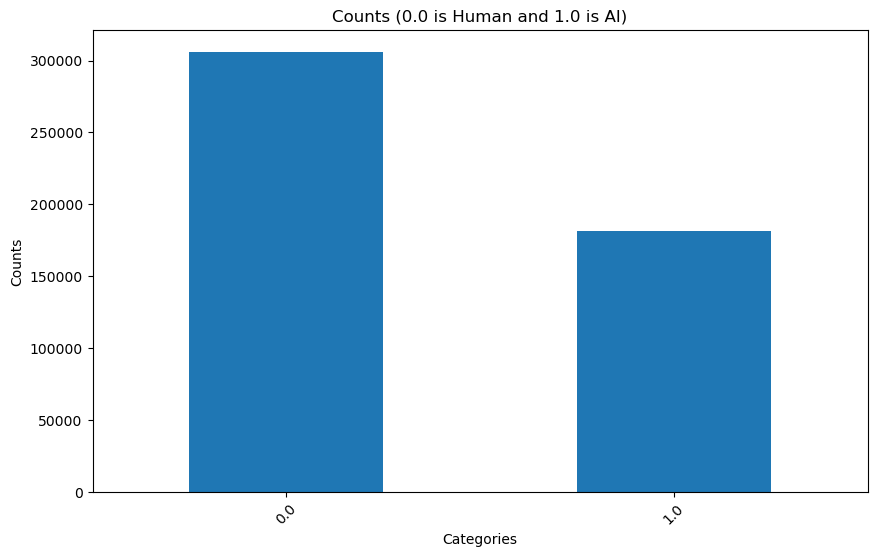

In [10]:
# Plot the counts
plt.figure(figsize=(10, 6))
generated_counts.plot(kind='bar')
plt.title('Counts (0.0 is Human and 1.0 is AI)')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Check to make sure there are no null values
df_text.isnull().sum()

text         0
generated    0
dtype: int64

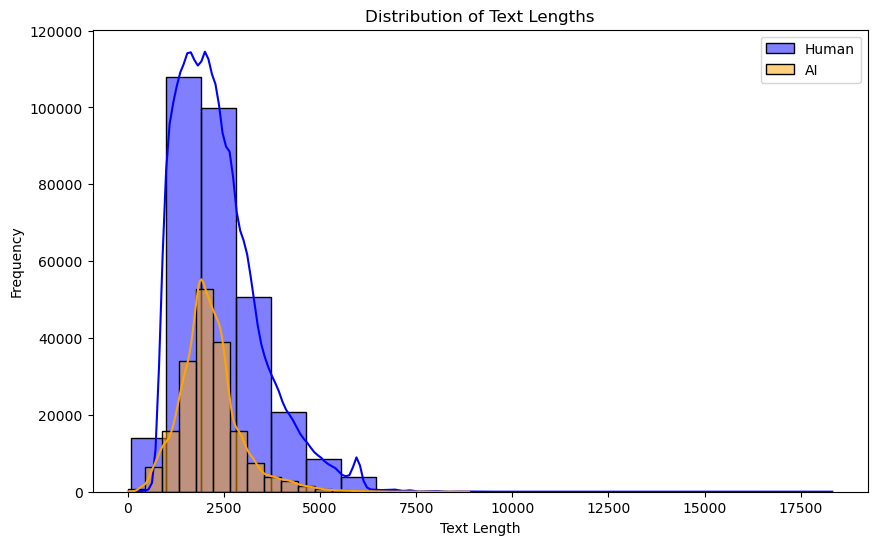

In [12]:
# Subset data into only human texts and only ai texts
human_texts = df_text[df_text['generated'] == 0.0]
ai_texts = df_text[df_text['generated'] == 1.0]

# Calculate text lengths for human-generated and AI-generated texts
human_text_lengths = human_texts['text'].apply(len)
ai_text_lengths = ai_texts['text'].apply(len)

# Plot histograms for both human-generated and AI-generated text lengths
plt.figure(figsize=(10, 6))
sns.histplot(human_text_lengths, kde=True, bins=20, label='Human', color='blue', alpha=0.5)
sns.histplot(ai_text_lengths, kde=True, bins=20, label='AI', color='orange', alpha=0.5)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()

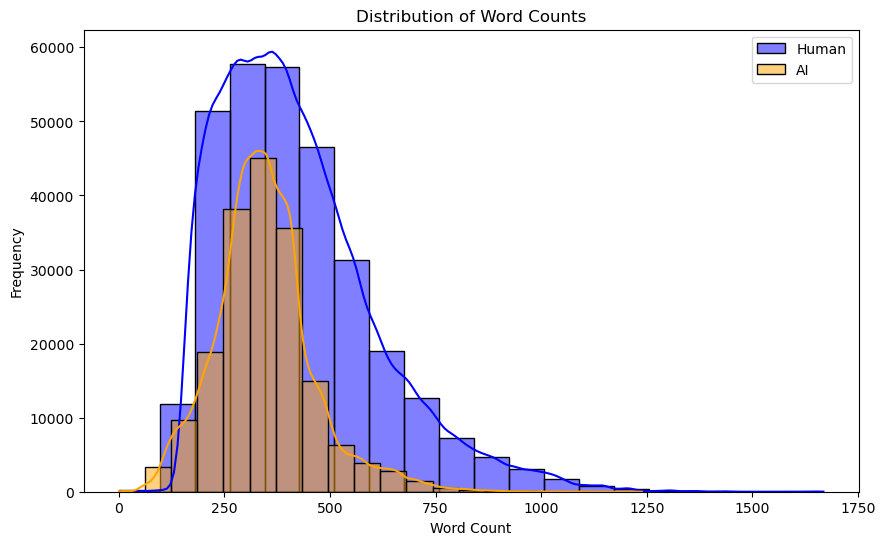

In [13]:
# Calculate word counts for human-generated and AI-generated texts
human_word_counts = human_texts['text'].apply(lambda x: len(str(x).split()))
ai_word_counts = ai_texts['text'].apply(lambda x: len(str(x).split()))

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create histograms
sns.histplot(human_word_counts, kde=True, bins=20, label='Human', color='blue', alpha=0.5)
sns.histplot(ai_word_counts, kde=True, bins=20, label='AI', color='orange', alpha=0.5)

# Adding plot title and labels
plt.title("Distribution of Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [14]:
# Create a word cloud showing frequency that words appear in human-generated texts and ai-generated texts
def create_wordcloud(data, column, title):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',  
        colormap='viridis',        
        collocations=False,
        max_font_size=100,         
        min_font_size=10,          
        scale=2,                   
        random_state=42
    ).generate(' '.join(data[column].astype(str)))

    # Create a figure
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {column} generated by {title}', fontsize=20, color='black') 
    plt.axis('off')
    plt.show()

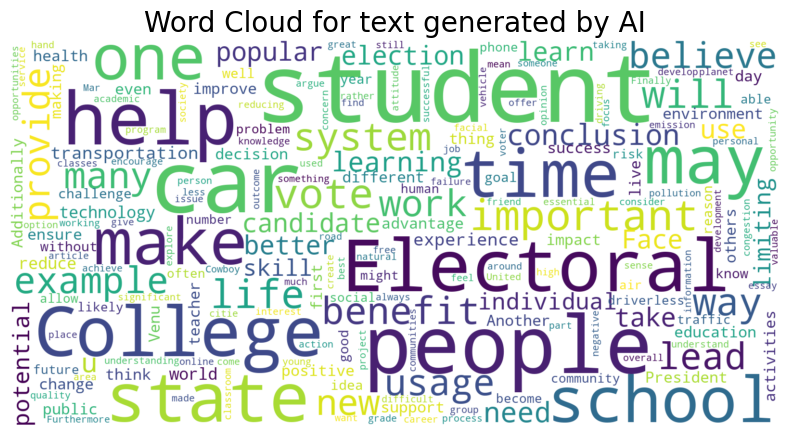

In [15]:
# Create word cloud for ai generated text
create_wordcloud(ai_texts, 'text', 'AI')

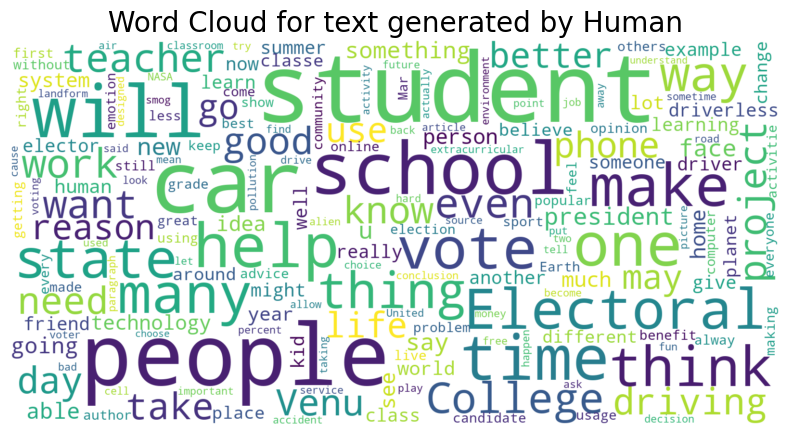

In [16]:
# Create word cloud for human generated text
create_wordcloud(human_texts, 'text', 'Human')